In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset into python environment

In [2]:
 titanic_data=pd.read_csv('titanic__dataset.csv')
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# 2. Do all the necessary pre-processing steps

In [3]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_data.shape   

(891, 12)

In [6]:
titanic_data['PassengerId'].nunique()    ### all values are unique...so it doesnt contribute much to our model

891

In [7]:
## droping columns which may not contribute much to our model such as Name, Ticket, Cabin
col=['Name','Ticket','Cabin','PassengerId']
titanic_data=titanic_data.drop(col,axis=1)

In [8]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [9]:
# checking null values
missing_values=titanic_data.isna().sum()
missing_values[missing_values>0]/len(titanic_data)*100

Age         19.865320
Embarked     0.224467
dtype: float64

In [10]:
# filling numerical null values using median
titanic_data['Age']=titanic_data['Age'].fillna(titanic_data['Age'].median())


# filling objective type null values using mode
titanic_data['Embarked'].value_counts()    #...."s" is most repeating 
titanic_data['Embarked']=titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

In [11]:
titanic_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
titanic_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<AxesSubplot:>

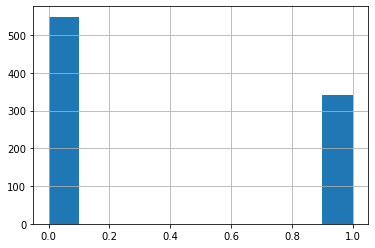

In [13]:
titanic_data['Survived'].hist()

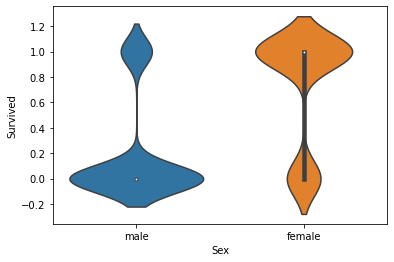

In [14]:
sns.violinplot(x=titanic_data['Sex'],y=titanic_data['Survived'])
plt.show()

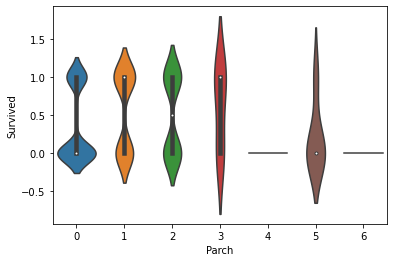

In [15]:
sns.violinplot(x=titanic_data['Parch'],y=titanic_data['Survived'])
plt.show()

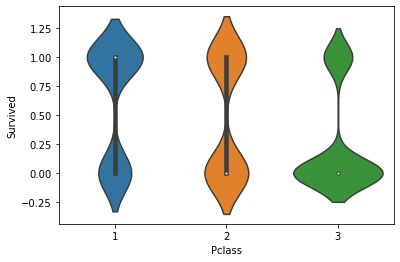

In [16]:
sns.violinplot(x=titanic_data['Pclass'],y=titanic_data['Survived'])
plt.show()

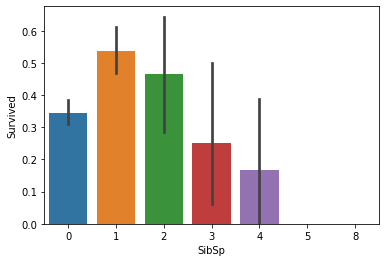

In [17]:
sns.barplot(x=titanic_data['SibSp'],y=titanic_data['Survived'])
plt.show()

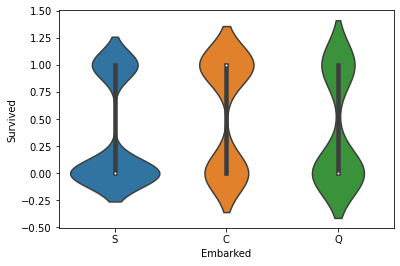

In [18]:
sns.violinplot(x=titanic_data['Embarked'],y=titanic_data['Survived'])
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


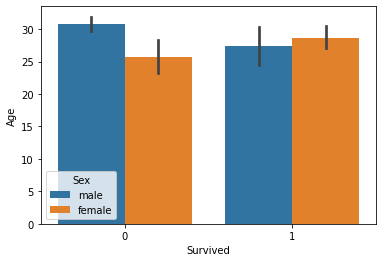

In [19]:
sns.barplot(titanic_data['Survived'],titanic_data['Age'],titanic_data['Sex'])
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


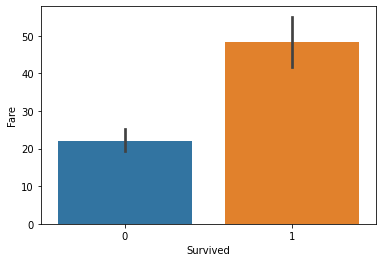

In [20]:
sns.barplot(titanic_data['Survived'],titanic_data['Fare'])
plt.show()

In [21]:
## from the above plots we can say that few males are survived as compared to females, 1st and 2nd class had more survivers than 3rd class

<AxesSubplot:>

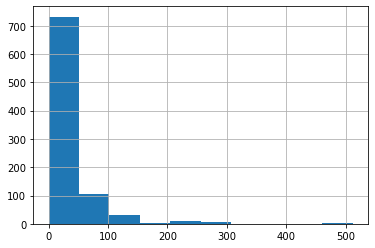

In [22]:
titanic_data['Fare'].hist()


<AxesSubplot:>

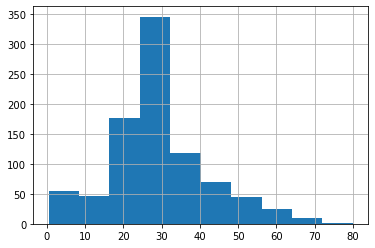

In [23]:
titanic_data['Age'].hist()


<AxesSubplot:>

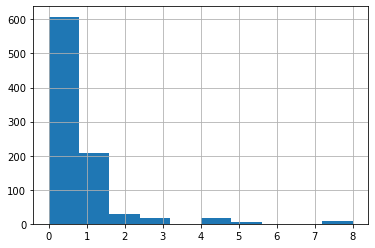

In [24]:
titanic_data['SibSp'].hist()


In [25]:
## here both fare and age are skewwd is left skewed
## checking skewness

print('skewness value of Age: ',titanic_data['Age'].skew())
print('skewness value of Fare: ',titanic_data['Fare'].skew())
print('skewness value of Age: ',titanic_data['SibSp'].skew())

skewness value of Age:  0.5102446555756495
skewness value of Fare:  4.787316519674893
skewness value of Age:  3.6953517271630565


In [26]:
## here 'fare' and 'sibsp' are rightly skewed......for a normrl distribution skweness value should be with in [-1,1]
## printin the outliers using inter quartile range

Q1=titanic_data['Fare'].quantile(0.25)
Q3=titanic_data['Fare'].quantile(0.75)
IQR=Q3-Q1
IQR

23.0896

In [27]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

print(low_lim)
print(up_lim)

-26.724
65.6344


In [28]:
outliers=[]
for i in titanic_data['Fare']:
    if(i>up_lim) or (i<low_lim):
        outliers.append(i)     

In [29]:
 outliers  

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [30]:
titanic_data['Fare']=np.where(titanic_data['Fare']>up_lim,up_lim,np.where(titanic_data['Fare']<low_lim,low_lim,titanic_data['Fare']))

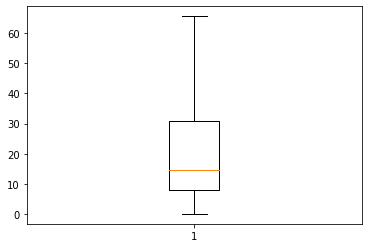

In [31]:
plt.boxplot(titanic_data['Fare'])
plt.show()     #####....outliers in fare are handled

In [32]:
## sibsp outlier handling
Q1=titanic_data['SibSp'].quantile(0.25)
Q3=titanic_data['SibSp'].quantile(0.75)
IQR=Q3-Q1
IQR


1.0

In [33]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

print(low_lim)
print(up_lim)

-1.5
2.5


In [34]:
outliers=[]
for i in titanic_data['SibSp']:
    if(i>up_lim) or (i<low_lim):
        outliers.append(i)   

In [35]:
 outliers  

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [36]:
titanic_data['SibSp']=np.where(titanic_data['SibSp']>up_lim,up_lim,np.where(titanic_data['SibSp']<low_lim,low_lim,titanic_data['SibSp']))

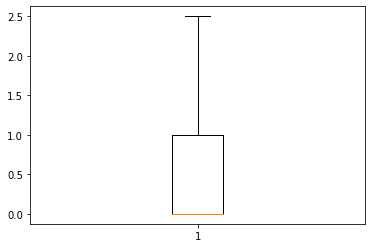

In [37]:
plt.boxplot(titanic_data['SibSp'])
plt.show()

In [38]:
titanic_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1.0,0,7.2500,S
1,1,1,female,38.0,1.0,0,65.6344,C
2,1,3,female,26.0,0.0,0,7.9250,S
3,1,1,female,35.0,1.0,0,53.1000,S
4,0,3,male,35.0,0.0,0,8.0500,S
5,0,3,male,28.0,0.0,0,8.4583,Q
6,0,1,male,54.0,0.0,0,51.8625,S
7,0,3,male,2.0,2.5,1,21.0750,S
8,1,3,female,27.0,0.0,2,11.1333,S
9,1,2,female,14.0,1.0,0,30.0708,C


In [39]:
## before doing scaling convert all categorical values into numerical values...

from sklearn.preprocessing import LabelEncoder

lc=LabelEncoder()
titanic_data.loc[:,'Sex']=lc.fit_transform(titanic_data['Sex'])

## 0 is male and 1 is female


In [40]:
## doing encoding
titanic_data=pd.get_dummies(titanic_data)

In [41]:
titanic_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1.0,0,7.2500,0,0,1
1,1,1,0,38.0,1.0,0,65.6344,1,0,0
2,1,3,0,26.0,0.0,0,7.9250,0,0,1
3,1,1,0,35.0,1.0,0,53.1000,0,0,1
4,0,3,1,35.0,0.0,0,8.0500,0,0,1


In [42]:
##  doing scaling

from sklearn.preprocessing import MinMaxScaler, StandardScaler


msc=MinMaxScaler()
titanic_data1=msc.fit_transform(titanic_data)

In [43]:
titanic_data1=pd.DataFrame(titanic_data1, columns=['Survived','Pclass','Age','SibSp','Parch','Fare','Sex','Embarked_C','Embarked_Q','Embarked_S'])
titanic_data1.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,1.0,0.271174,0.4,0.0,0.11046,0.0,0.0,1.0
1,1.0,0.0,0.0,0.472229,0.4,0.0,1.00000,1.0,0.0,0.0


In [44]:
titanic_data1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.654321,0.647587,0.363679,0.170595,0.063599,0.366375,0.188552,0.086420,0.725028
std,0.486592,0.418036,0.477990,0.163605,0.283298,0.134343,0.312056,0.391372,0.281141,0.446751
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.271174,0.000000,0.000000,0.120522,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.346569,0.000000,0.000000,0.220223,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,0.434531,0.400000,0.000000,0.472313,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
sc=StandardScaler()
titanic_data2_sc=sc.fit_transform(titanic_data)

In [46]:
titanic_data2_sc=pd.DataFrame(titanic_data2_sc, columns=['Survived','Pclass','Age','SibSp','Parch','Fare','Sex','Embarked_C','Embarked_Q','Embarked_S'])
titanic_data2_sc.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S
0,-0.789272,0.827377,0.737695,-0.565736,0.81022,-0.473674,-0.820552,-0.482043,-0.307562,0.615838
1,1.266990,-1.566107,-1.355574,0.663861,0.81022,-0.473674,2.031623,2.074505,-0.307562,-1.623803



# 3. Create kNN and SVM models

In [47]:
## when doing model selection we can drom the encoded columns and create our X and y


titanic_data1=titanic_data1.drop(['Embarked_C','Embarked_Q','Embarked_S'],axis=1)
titanic_data1.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex
0,0.0,1.0,1.0,0.271174,0.4,0.0,0.11046
1,1.0,0.0,0.0,0.472229,0.4,0.0,1.00000


In [48]:
X=titanic_data1.drop('Survived',axis=1)
y=titanic_data1['Survived']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

clf_svm=SVC(kernel='linear')
clf_svm=clf_svm.fit(X_train,y_train)
y_pred_svm=clf_svm.predict(X_test)

accuracy_score(y_test,y_pred_svm)


0.7877094972067039

In [50]:
clf_svm2=SVC(kernel='rbf')
clf_svm2=clf_svm2.fit(X_train,y_train)
y_pred_svm2=clf_svm2.predict(X_test)

accuracy_score(y_test,y_pred_svm)

0.7877094972067039

# KNN model

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knc=KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
knc.fit(X_train,y_train)
y_pred_knc=knc.predict(X_test)

accuracy_score(y_test,y_pred_knc)

0.7988826815642458

# 4. Do k-fold and stratified stratified k-fold cross validation techniques and find the average accuracy score of the models


In [52]:
from statistics import mean, stdev
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model

In [53]:
x_scaled=msc.fit_transform(X)

lr = linear_model.LogisticRegression()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []



In [54]:
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))

In [55]:
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

List of possible accuracy: [0.7888888888888889, 0.7752808988764045, 0.7415730337078652, 0.8539325842696629, 0.7191011235955056, 0.8202247191011236, 0.7078651685393258, 0.7865168539325843, 0.8539325842696629, 0.7752808988764045]

Maximum Accuracy That can be obtained from this model is: 85.39325842696628 %

Minimum Accuracy: 70.78651685393258 %

Overall Accuracy: 78.22596754057429 %

Standard Deviation is: 0.05061157211574623
